In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import os

# 변경하고자 하는 새로운 디렉토리 경로
new_directory = '/content/drive/MyDrive'

# 디렉토리 위치 변경
os.chdir(new_directory)

# 변경된 디렉토리 경로 출력
print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive


In [25]:
import pandas as pd
import numpy as np
from dezero.core_simple import Variable

# 여러 함수
- sphere 함수

- matyas 함수

- goldstein-price 함수

In [26]:
"""
 Sphere
      """
def sphere(x,y):
  z = x ** 2 + y ** 2
  return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = sphere(x,y)
z.backward()
print(x.grad, y.grad)

2.0 2.0


In [27]:
"""
  Matyas 미분
              """
def matyas_fun(x,y):
  z = sub(mul(0.26, add(pow(x,2). pow(y,2))), mul(0.48, mul(x,y)))
  return z

def matyas(x,y):
  z = 0.26 * (x**2 + y **2) - 0.48*x*y
  return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = matyas(x,y)
z.backward()
print(x.grad, y.grad)

0.040000000000000036 0.040000000000000036


In [28]:
"""
  Goldstein-Price 미분
                        """
def goldstein(x,y):
  z = (1 + (x + y + 1) **2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
      (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
  return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x,y)
z.backward()
print(x.grad, y.grad)

#이런 것도 있다는 것을 알았으나 이해 실패

-5376.0 8064.0


In [ ]:
from dezero.core_simple import Variable
from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose = False)
print(txt)

with open('sample_26.dot','w') as o:
  o.write(txt)


"""
  계산 그래프를 시각화
    - 사용한 함수 : get_dot_graph
    - DOT 언어 -> 출력 변수 y를 변환함(문자열로)
                                                """

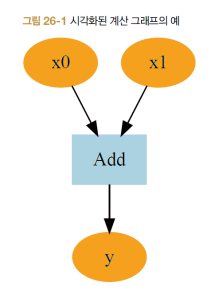

In [31]:
def _dot_var(v, verbose=False):
  dot_var = '{} [label="{}", color = orange, style = filled]\n'

  name = '' if v.name is None else v.name
  if verbose and v.data is not None:
    if v.name is not None:
      name +=': '
  return dot_var.format(id(v), name)

### _dot_var
- get_dot_graph 전용 함수

- 고유한 ID 부여를 위해 파이썬 내장 함수 ID를 사용

- format -> '{}' 인수로 보낸 객체 순서대로 차례로 바꿔줌

In [32]:
x = Variable(np.random.randn(2,3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

135301639328848 [label="x", color = orange, style = filled]

135301639328848 [label="x: ", color = orange, style = filled]



In [33]:
def _dot_func(f):
  dot_func = '{} [label="{}", color = lightblue, style = filled, shape=box]\n'
  ret = dot_func.format(id(f), f.__class__.__name__)

  dot_edge = '{} -> {}\n'
  for x in f.inputs:
    ret += dot_edge.format(id(x), id(f))
  for y in f.outputs:
    ret += dot_edge.format(id(f), id(y()))
  return ret

## _dot_func
- dezero 함수들을 DOT로 전환

- Function 클래스 -> 상속 / inputs & outputs -> 인스턴스 변수 생성

- get_dot_graph 함수 전용

In [34]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
txt = _dot_func(y.creator)
print(txt)

135301639334416 [label="Add", color = lightblue, style = filled, shape=box]
135301639328080 -> 135301639334416
135301639333888 -> 135301639334416
135301639334416 -> 135301639334512



In [35]:
def get_dot_graph(output, verbose=True):
  txt = ''
  funcs = []
  seen_set = set()

  def add_func(f):
    if f not in seen_set:
      funcs.append(f)
      # funcs.sort(key=lambda x : x.generation)
      seen_set.add(f)

  add_func(output.creator)
  txt +=_dot_var(output, verbose)
  while funcs:
    func = funcs.pop()
    txt += _dot_func(func)
    for x in func.inputs:
      txt += _dot_var(x,verbose)

      if x.creator is not None:
        add_func(x.creator)
  return 'digraph g {\n' + txt + '}'

## get_dot_graph
- Variable class의 Backward 유사도 높음

- 원래 Backward는 미분값을 전파 / but get_dot_graph는 DOT로 변경한 txt 추가

- Backward를 위해 추가된 Generation 정수 값 유지됨

In [ ]:
from dezero.utils import plot_dot_graph
x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x,y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file = 'goldstein.png')

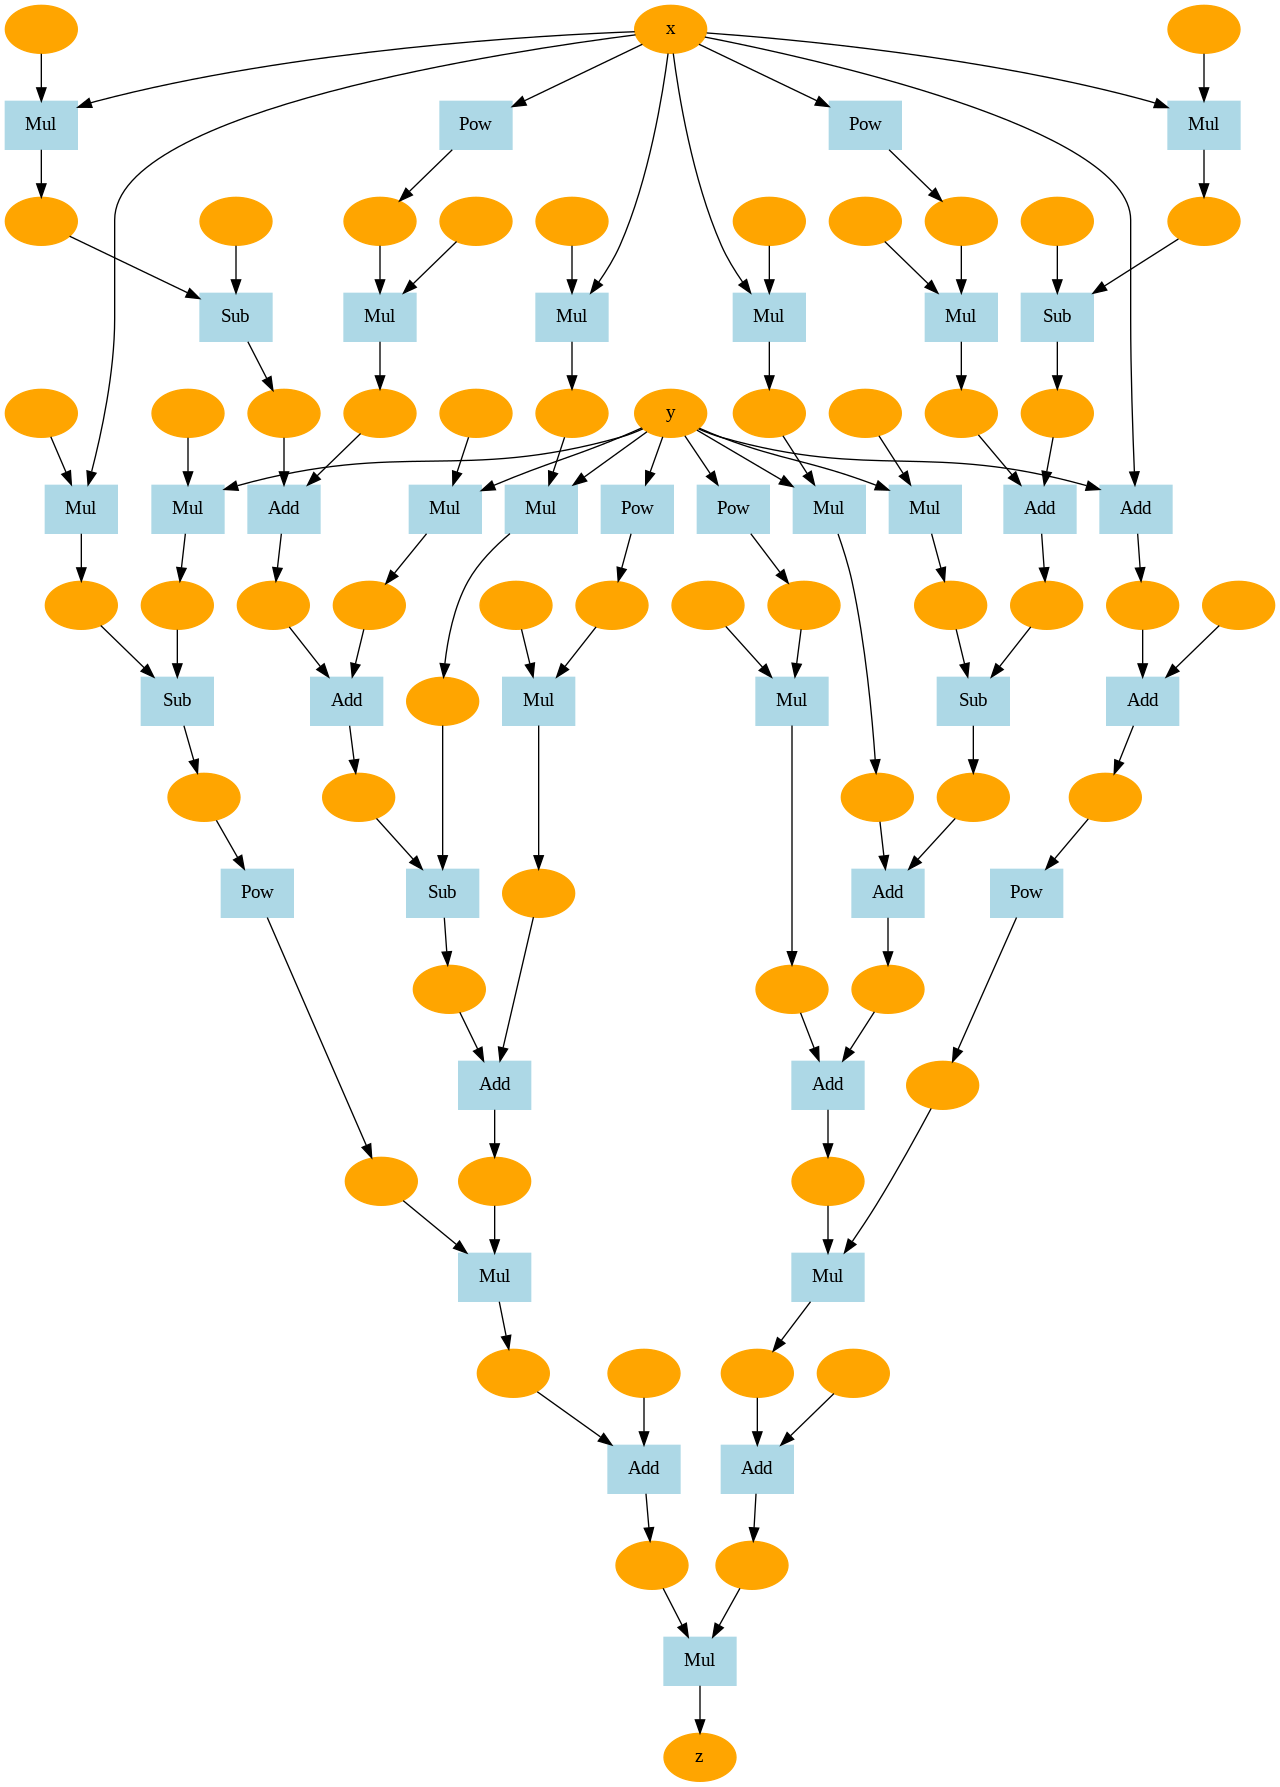

In [ ]:
# Sin

from dezero import Variable, Function

class Sin(Function):
  def forward(self, x):
    y = np.sin(x)
    return y

  def backward(self, gy):
    x = self.input[0].data
    gx = gy * np.cos(x)
    return gx

def sin(x):
  return Sin()(x)

## 테일러 급수(Sin 함수 구현)
- threshold 근사치 정밀도 조정

- 작을 수록 정밀도가 높아짐

In [37]:
import math
def my_sin(x, threshold = 0.0001):
  y = 0
  for i in range(100000):
    c = (-1) ** i / math.factorial(2*i+1)
    t = c * x ** (2*i+1)
    y = y + t
    if abs(t.data) < threshold:
      break
    return y

In [38]:
# 로젠브록 함수

def rosenbrock(x0,x1):
  y = 100 * (x1 - x0 **2) **2 +(x0 - 1) **2
  return y

수치 데이터를 Variable 감쌈 -> 수식 따라감

기울기 : (-2.0, 400.0)

반대로 (2.0, -400.0) : y를 극대로 줄여줌

## 경사하강법
- 좋은 초깃 값은 목적지까지 효율적으로 도달함

- 기울기 방향대로 이동 -> 기울기 계산 -> 최소 or 최대 값 도달

## 로젠브록 함수
- iters = 반복횟수, lr = 학습률

- 기울기에 마이너스를 곱함

- 미분 값이 누적됨 -> 초기화 -> 새로운 미분 계산

In [ ]:
# ▪ 반복횟수 iters = 1200
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001
iters = 1200

for i in range(iters):
  print(x0,x1)

  y = rosenbrock(x0, x1)

  x0.cleargrad()
  x1.cleargrad()
  y.backward()

  x0.data -= lr * x0.grad
  x1.data -= lr * x1.grad

In [ ]:
# ▪ 반복횟수 iters = 12000
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001
iters = 12000

for i in range(iters):
  print(x0,x1)

  y = rosenbrock(x0, x1)

  x0.cleargrad()
  x1.cleargrad()
  y.backward()

  x0.data -= lr * x0.grad
  x1.data -= lr * x1.grad

In [ ]:
# ▪ 반복횟수 iters = 50000
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 0.001
iters = 5000

for i in range(iters):
  print(x0,x1)

  y = rosenbrock(x0, x1)

  x0.cleargrad()
  x1.cleargrad()
  y.backward()

  x0.data -= lr * x0.grad
  x1.data -= lr * x1.grad

  # iters 값 커질 수록 최솟 값에 가까워짐

## 뉴턴하강법

In [ ]:
def f(x):
  y = x ** 4 - 2 * x **2
  return y

def gx2(x):
  return 12 * x **2 -4

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
  print(i, x)

  y = f(x)
  x.cleargrad()
  y.backward()

  x.data -=x.grad / gx2(x.data)